EE7204 - Computer Vision and Image Processing -
EG/2019/3775
Weerawardhane W.A.S.V.

Take Home Assignment II

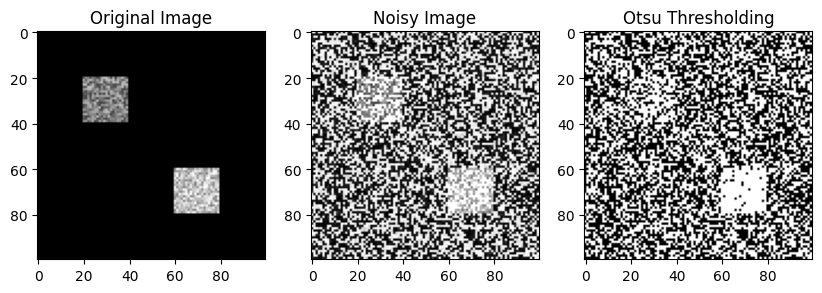

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Generating synthetic image with 2 objects and Gaussian noise
img = np.zeros((100, 100), dtype=np.uint8)
obj1 = np.random.randint(50, 150, size=(20, 20))
obj2 = np.random.randint(100, 200, size=(20, 20))
img[20:40, 20:40] = obj1
img[60:80, 60:80] = obj2

# Adding Gaussian noise
noise = np.random.normal(0, 20, img.shape).astype(np.uint8)
noisy_img = cv2.add(img, noise)

# Applying Otsu's thresholding
_, otsu_img = cv2.threshold(noisy_img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Plotting
plt.figure(figsize=(10, 5))
plt.subplot(131), plt.imshow(img, cmap='gray'), plt.title('Original Image')
plt.subplot(132), plt.imshow(noisy_img, cmap='gray'), plt.title('Noisy Image')
plt.subplot(133), plt.imshow(otsu_img, cmap='gray'), plt.title('Otsu Thresholding')
plt.show()


Saving 108073-6.jpg to 108073-6 (7).jpg


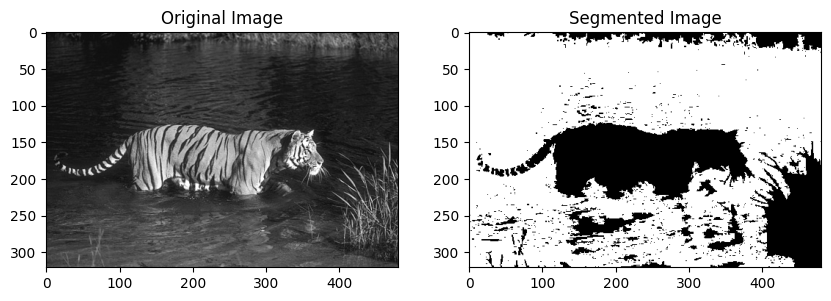

In [26]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def region_growing(img, seed, threshold):
    region = np.zeros_like(img)
    region[seed] = 1
    neighbor_pixels = [(-1, 0), (1, 0), (0, -1), (0, 1)]  # 4-connectivity
    while len(seed) > 0:
        current_seed = seed.pop()
        for dx, dy in neighbor_pixels:
            x, y = current_seed[0] + dx, current_seed[1] + dy
            if 0 <= x < img.shape[0] and 0 <= y < img.shape[1] and region[x, y] == 0:
                if abs(int(img[x, y]) - int(img[current_seed])) <= threshold:
                    region[x, y] = 1
                    seed.append((x, y))
    return region

# Upload an image file
from google.colab import files
uploaded = files.upload()

# Read the uploaded image
file_name = next(iter(uploaded))
img = cv2.imread(file_name, cv2.IMREAD_GRAYSCALE)

# Check if image is loaded successfully
if img is None:
    print("Error: Unable to load image.")
else:
    # Setting seed point and threshold for region growing
    seed_point = (50, 50)  # Example seed point, adjust as needed
    threshold = 7  # Example threshold value, adjust as needed

    # Applying region growing
    segmented_img = region_growing(img, [seed_point], threshold)

    # Plotting
    plt.figure(figsize=(10, 5))
    plt.subplot(121), plt.imshow(img, cmap='gray'), plt.title('Original Image')
    plt.subplot(122), plt.imshow(segmented_img, cmap='gray'), plt.title('Segmented Image')
    plt.show()
